### Predictive Analytics for Customer Churn in the Streaming Industry.

#### Problem Statement: 
The goal of this project is to develop a predictive model that can accurately identify customers who are likely to churn (cancel their subscription) for a subscription-based service. By predicting churn in advance, the company can take proactive measures to retain these customers and minimize revenue loss.

### Data Exploration and Preprocessing

In [1]:
#importing necessary liabaries.
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [2]:
#pip install xgboost
#pip install catboost
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report

In [3]:
#reading dataset.
df=pd.read_csv('E:\learntube\project\customet chrun\ott_churn_model_dataset.csv')
df.head()

year  customer_id  phone_no  gender  age  no_of_days_subscribed  \
0  2020       100198  409-8743  Female   36                     62   
1  2020       100643  340-5930  Female   39                    149   
2  2020       100756  372-3750  Female   65                    126   
3  2020       101595  331-4902  Female   24                    131   
4  2020       101653  351-8398  Female   40                    191   

  multi_screen mail_subscribed  weekly_mins_watched  minimum_daily_mins  \
0           no              no               148.35                12.2   
1           no              no               294.45                 7.7   
2           no              no                87.30                11.9   
3           no             yes               321.30                 9.5   
4           no              no               243.00                10.9   

   maximum_daily_mins  weekly_max_night_mins  videos_watched  \
0               16.81                     82               1   
1               33.37                     87               3   
2                9.89                     91               1   
3               36.41                    102               4   
4               27.54                     83               7   

   maximum_days_inactive  customer_support_calls Churn  
0                    4.0                       1    No  
1                    3.0                       2    No  
2                    4.0                       5   Yes  
3                    3.0                       3    No  
4                    3.0                       1    No

### Demographic and Subscription Details
* gender: May influence preferences and content consumption patterns.
* age: Different age groups might have varying levels of engagement and loyalty.
* no_of_days_subscribed: Duration of subscription can indicate loyalty, longer subscriptions might correlate with lower churn.
* multi_screen: The number of screens used could reflect household size or usage patterns.
* mail_subscribed: Engagement with marketing communications might affect retention.

### Usage and Engagement Metrics
* weekly_mins_watched: Total time spent on the platform weekly, lower usage may indicate potential churn.
* minimum_daily_mins & maximum_daily_mins: Variability in daily usage can signal consistency in engagement.
* weekly_max_night_mins: Usage during specific times might reflect user habits.
* videos_watched: Number of videos consumed can be a direct indicator of engagement.

### Customer Interaction and Support
* maximum_days_inactive: Longer periods of inactivity may leads to  churn.
* customer_support_calls: Frequent support interactions can indicate customer issues or dissatisfaction.

### Target Variable
* Churn: Indicates whether a customer has left the service. This is our dependent variable for modeling.

### Exploratary Data analysis

In [4]:
# exploring dataset and summerizing it.
df.shape

(2000, 16)

In [5]:
# exploring dataset and summerizing it.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [6]:
#checking columns name.
df.columns.values

array(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'Churn'], dtype=object)

<Axes: >

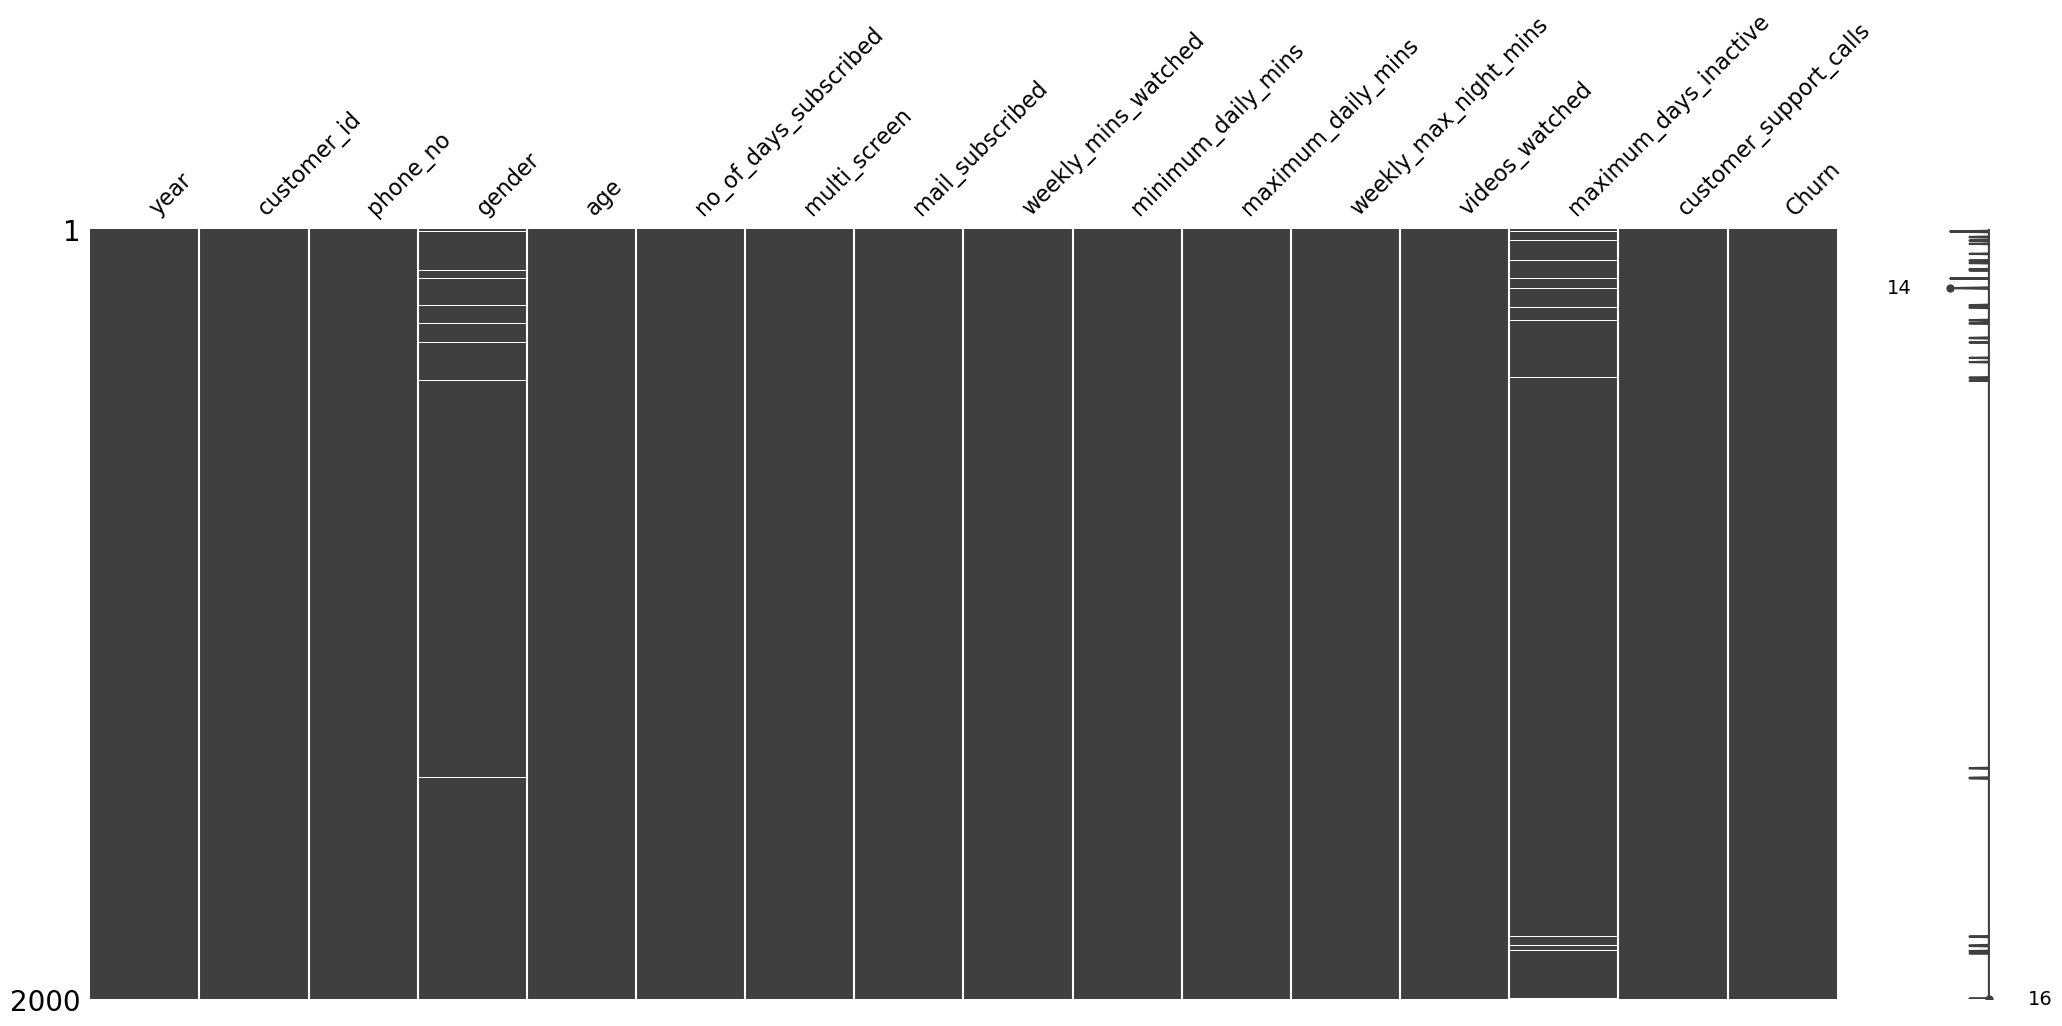

In [7]:
# Visualize missing values.
msno.matrix(df)

In [8]:
#checking for null values in dataset.
df.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
Churn                      0
dtype: int64

* We can see that gender,maximum days inctive have null values present.
* out of 2000 records only 24 records are empty for gender that won't effect much so will can fill those blank values with mode.
* out of 2000 records only 28 records are empty for maximum_days_inactive that won't effect much so will can fill those blank values with mean.

### Data Manipulation.

In [9]:
#filling missing values with mode.
df['gender'].fillna(df['gender'].mode()[0], inplace=True)
df['maximum_days_inactive'].fillna(df['maximum_days_inactive'].mean(),inplace=True)

In [10]:
#verifying null values are still present or not.
df.isnull().sum()

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
Churn                     0
dtype: int64

* No missing records are present in dataset.

In [11]:
#checking for duplicate values.
df.duplicated().sum()

0

* No duplicate records are present in dataset.

In [12]:
# To check is there any year present or not? 
df["year"].unique()

array([2020], dtype=int64)

* Year have only 1 value is 2020 so we can drop this columns also.

In [13]:
#droppimg un-necessary Column.
df=df.drop(['customer_id','phone_no','year'],axis=1)
df

gender  age  no_of_days_subscribed multi_screen mail_subscribed  \
0     Female   36                     62           no              no   
1     Female   39                    149           no              no   
2     Female   65                    126           no              no   
3     Female   24                    131           no             yes   
4     Female   40                    191           no              no   
...      ...  ...                    ...          ...             ...   
1995  Female   54                     75           no             yes   
1996    Male   45                    127           no              no   
1997    Male   53                     94           no              no   
1998    Male   40                     94           no              no   
1999    Male   37                     73           no              no   

      weekly_mins_watched  minimum_daily_mins  maximum_daily_mins  \
0                  148.35                12.2               16.81   
1                  294.45                 7.7               33.37   
2                   87.30                11.9                9.89   
3                  321.30                 9.5               36.41   
4                  243.00                10.9               27.54   
...                   ...                 ...                 ...   
1995               182.25                11.3               20.66   
1996               273.45                 9.3               30.99   
1997               128.85                15.6               14.60   
1998               178.05                10.4               20.18   
1999               326.70                10.3               37.03   

      weekly_max_night_mins  videos_watched  maximum_days_inactive  \
0                        82               1               4.000000   
1                        87               3               3.000000   
2                        91               1               4.000000   
3                       102               4               3.000000   
4                        83               7               3.000000   
...                     ...             ...                    ...   
1995                     97               5               4.000000   
1996                    116               3               3.000000   
1997                    110              16               5.000000   
1998                    100               6               3.250507   
1999                     89               6               3.000000   

      customer_support_calls Churn  
0                          1    No  
1                          2    No  
2                          5   Yes  
3                          3    No  
4                          1    No  
...                      ...   ...  
1995                       2    No  
1996                       1    No  
1997                       0    No  
1998                       3    No  
1999                       1   Yes  

[2000 rows x 13 columns]

In [14]:
#description of each numerical column.
df.describe()

age  no_of_days_subscribed  weekly_mins_watched  \
count  2000.00000            2000.000000          2000.000000   
mean     38.69050              99.750000           270.178425   
std      10.20641              39.755386            80.551627   
min      18.00000               1.000000             0.000000   
25%      32.00000              73.000000           218.212500   
50%      37.00000              99.000000           269.925000   
75%      44.00000             127.000000           324.675000   
max      82.00000             243.000000           526.200000   

       minimum_daily_mins  maximum_daily_mins  weekly_max_night_mins  \
count         2000.000000         2000.000000            2000.000000   
mean            10.198700           30.620780             100.415500   
std              2.785519            9.129165              19.529454   
min              0.000000            0.000000              42.000000   
25%              8.400000           24.735000              87.000000   
50%             10.200000           30.590000             101.000000   
75%             12.000000           36.797500             114.000000   
max             20.000000           59.640000             175.000000   

       videos_watched  maximum_days_inactive  customer_support_calls  
count     2000.000000            2000.000000             2000.000000  
mean         4.482500               3.250507                1.547000  
std          2.487728               0.803397                1.315164  
min          0.000000               0.000000                0.000000  
25%          3.000000               3.000000                1.000000  
50%          4.000000               3.000000                1.000000  
75%          6.000000               4.000000                2.000000  
max         19.000000               6.000000                9.000000

### Observations.
* The average age of customers is 38.
* Most customers subscribe for 99 days.
* On average, customers watch 4 videos.
* Customers remain inactive for an average of 3 days.

In [15]:
#seprating categorical and numerical columns in dataset.
numeric_data = df.select_dtypes(include='number')
categorical_data = df.select_dtypes(exclude='number')

In [16]:
#numeric_data
categorical_data

gender multi_screen mail_subscribed Churn
0     Female           no              no    No
1     Female           no              no    No
2     Female           no              no   Yes
3     Female           no             yes    No
4     Female           no              no    No
...      ...          ...             ...   ...
1995  Female           no             yes    No
1996    Male           no              no    No
1997    Male           no              no    No
1998    Male           no              no    No
1999    Male           no              no   Yes

[2000 rows x 4 columns]

### Data Visualization

In [17]:
#comparing gender wise churn to understand genderwise pattern.
g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=g_labels, values=df['gender'].value_counts(), name="Gender"),
              1, 1)
fig.add_trace(go.Pie(labels=c_labels, values=df['Churn'].value_counts(), name="Churn"),
              1, 2)
# Use `hole` to create a donut like pie.
fig.update_traces(hole=.4, hoverinfo="label+percent", textfont_size=16)

fig.update_layout(
    title_text="Gender and Churn Distributions",
    
    # Adding annotations in the center of the donut.
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False)])
fig.show()


* 13.1 % of customers switched to another OTT platform.
* Customers are 46.2 % female and 53.8 % male.

In [18]:
#Camparing chrun with mail_subcribed by customer.
fig = px.histogram(df, x="Churn", color="mail_subscribed", barmode="group", title="<b>Customer Mail Subscription<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

Text(0, 0.5, 'Frequency')

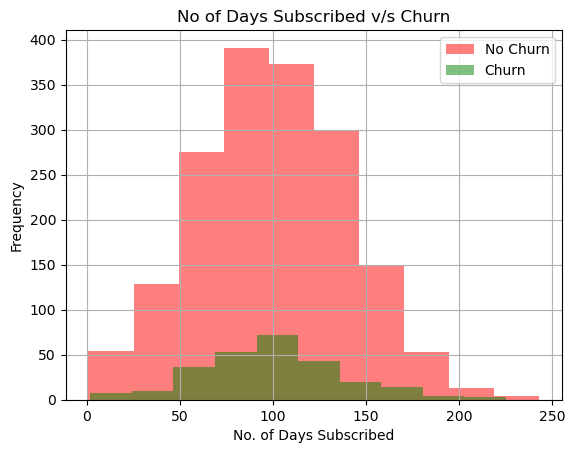

In [19]:
#understanding customer pattern with how many days they had subscribed platform.
df[df['Churn'] == 'No']['no_of_days_subscribed'].hist(alpha=0.5, label='No Churn',color='red')
df[df['Churn'] == 'Yes']['no_of_days_subscribed'].hist(alpha=0.5, label='Churn',color='green')
plt.legend()
plt.title('No of Days Subscribed v/s Churn')
plt.xlabel('No. of Days Subscribed')
plt.ylabel('Frequency')

#### This histogram compares the distribution of the number of days subscribed for customers who churned versus those who did not. Key insights:
1. No Churn (in red): Most customers who did not churn have subscriptions around 100 days, with a wider spread extending from around 50 to 150 days. The frequency of longer subscriptions is much higher for non-churned customers.
2. Churn (in green): Customers who churned have a more concentrated distribution, also around the 100-day mark, but with a lower frequency and a smaller overall spread. Fewer churned customers subscribed for longer periods compared to non-churned customers.
#### Summary:
* Customers who churn tend to have fewer subscription days overall, with a smaller portion having longer subscriptions, while those who remain subscribed tend to stay longer, with a broader range of subscription lengths.

<Axes: xlabel='weekly_mins_watched', ylabel='maximum_daily_mins'>

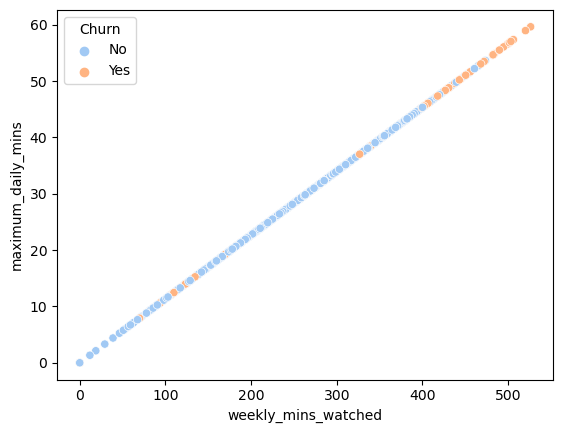

In [20]:
#checking corelation of customer watching habits with churn.
sns.scatterplot(x='weekly_mins_watched', y='maximum_daily_mins', hue='Churn', data=df,palette=sns.color_palette('pastel', n_colors=5))

### Insights:
* The scatter plot shows a positive correlation between weekly minutes watched and maximum daily minutes, meaning users who watch more minutes per week tend to also watch more on their busiest days
* There is some overlap between churned and non-churned users, suggesting that viewing habits alone may not be enough to predict churn.

Text(0.5, 1.0, 'Distribution of Age by churn')

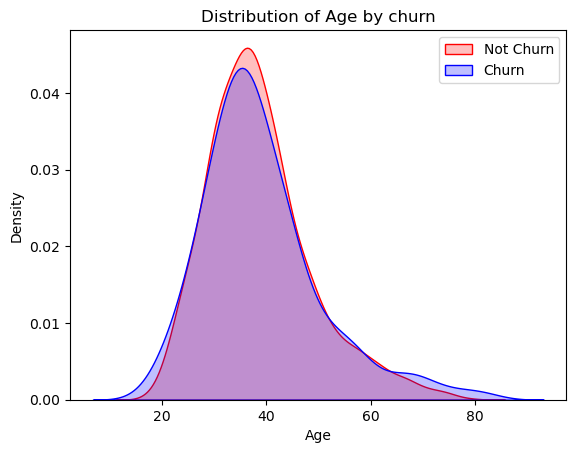

In [21]:
#age distribution by chrun.
ax = sns.kdeplot(df.age[(df["Churn"] == 'No') ],color="Red", shade = True)
ax = sns.kdeplot(df.age[(df["Churn"] == 'Yes') ],ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"])
ax.set_ylabel('Density')
ax.set_xlabel('Age')
ax.set_title('Distribution of Age by churn')

#### Insights 
* The age distribution for both churned and non-churned users is skewed right, indicating a larger proportion of younger users in the dataset.
* There is some overlap between the age distributions of churned and non-churned users, suggesting that age alone may not be a strong predictor of churn.
* While the overlap is significant, there might be a slight trend where younger users (around 20-30) are more likely to churn compared to older users. However, this trend is not very pronounced.

<Axes: >

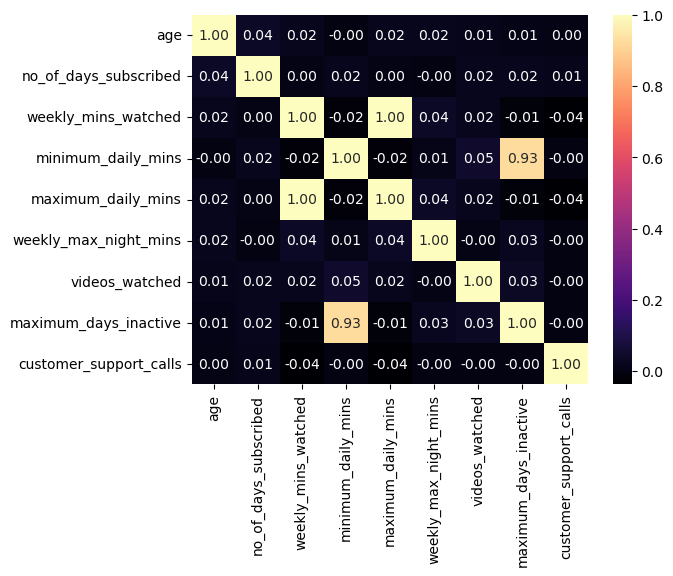

In [22]:
#correlation between all the metrics.
corr_matrix = df.corr() 
sns.heatmap(corr_matrix, annot=True, cmap='magma', fmt='.2f')

### Data Preprocessing

#### label encoding
* Label encoding is needed to convert categorical data (like text or labels) into numerical form because most machine learning algorithms require numerical inputs. 
* It allows algorithms to process and understand the data by assigning unique integer values to different categories, making it computationally efficient and compatible with models.

In [23]:
#creating function for label encoding to convert categorical data in numerical data.
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [24]:
#apllying lambda on all object dtype features/matrics.
df = df.apply(lambda x: object_to_int(x))
df.head()

gender  age  no_of_days_subscribed  multi_screen  mail_subscribed  \
0       0   36                     62             0                0   
1       0   39                    149             0                0   
2       0   65                    126             0                0   
3       0   24                    131             0                1   
4       0   40                    191             0                0   

   weekly_mins_watched  minimum_daily_mins  maximum_daily_mins  \
0               148.35                12.2               16.81   
1               294.45                 7.7               33.37   
2                87.30                11.9                9.89   
3               321.30                 9.5               36.41   
4               243.00                10.9               27.54   

   weekly_max_night_mins  videos_watched  maximum_days_inactive  \
0                     82               1                    4.0   
1                     87               3                    3.0   
2                     91               1                    4.0   
3                    102               4                    3.0   
4                     83               7                    3.0   

   customer_support_calls  Churn  
0                       1      0  
1                       2      0  
2                       5      1  
3                       3      0  
4                       1      0

### This calculates the correlation of df. 
The correlation matrix contains the correlation between all pairs of numerical columns in the DataFrame.
#### Correlation range from -1 to 1:
* 1 means a perfect positive correlation (as one variable increases, the other also increases).
* -1 means a perfect negative correlation (as one variable increases, the other decreases).
* 0 means no correlation (the variables are independent of each other).
* 'Churn' is  the target column in a dataset related to customer churn, where we're analyzing how other features  are correlated with whether or not a customer churned.

In [25]:
#checking correlation of target variable with all other matrics.
df.corr()['Churn'].sort_values(ascending=False)

Churn                     1.000000
multi_screen              0.258324
customer_support_calls    0.204774
weekly_mins_watched       0.162876
maximum_daily_mins        0.162874
minimum_daily_mins        0.066646
maximum_days_inactive     0.046348
age                       0.011777
weekly_max_night_mins     0.006917
no_of_days_subscribed     0.002517
gender                   -0.015122
videos_watched           -0.019314
mail_subscribed          -0.077705
Name: Churn, dtype: float64

In [26]:
#creating x and y variable to seprate target variable from database.
X = df.drop(columns = ['Churn'])
y = df['Churn'].values

### Summary
* X contains all the features (input data) needed to train the model.
* Y contains the target variable ('Churn') that the model will learn to predict.
* This is a standard practice in machine learning to separate input features from the output labels before training a model.

In [27]:
#splitting dataset into train and test.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 40, stratify=y)

This code is splitting the dataset into training and testing sets. It assigns 70% of the data to training (X_train, y_train) and 30% to testing (X_test, y_test), while ensuring the target class (y) is equally distributed across both sets using stratify=y. The random_state=40 ensures reproducibility of the split.

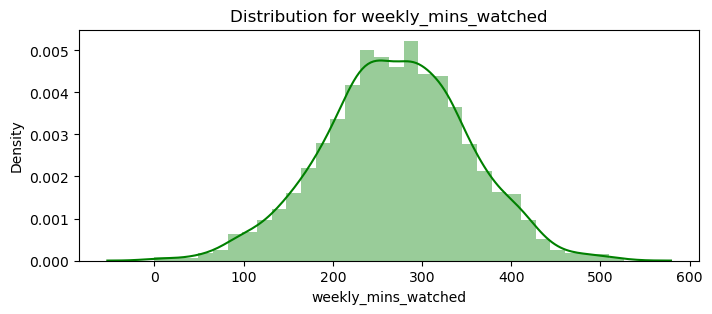

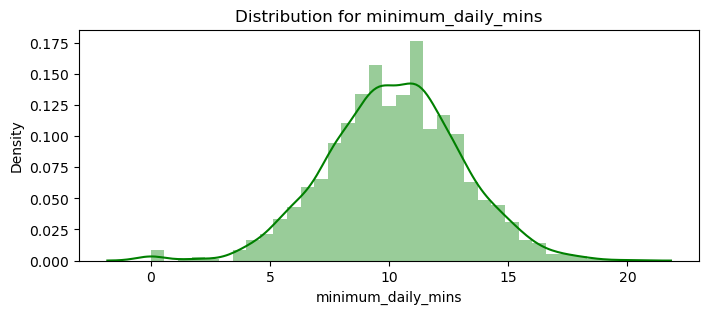

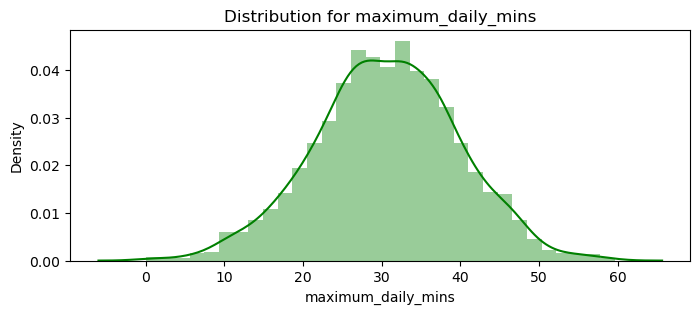

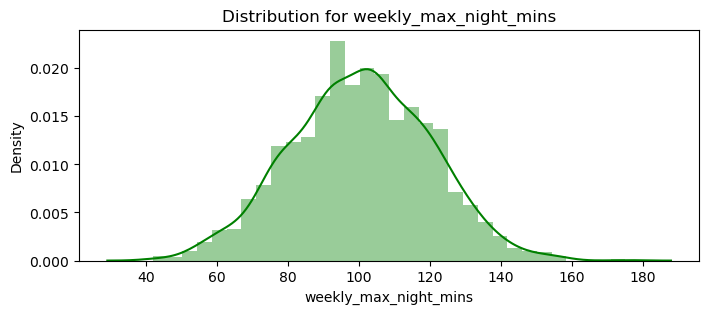

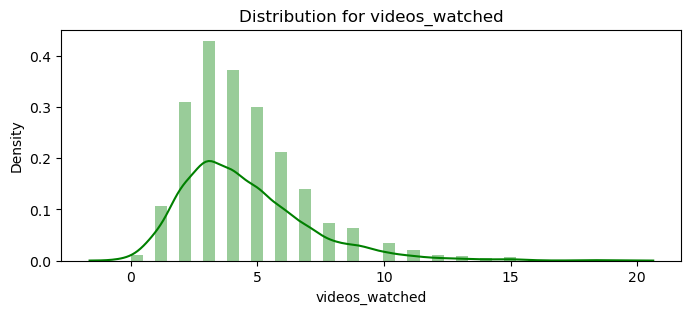

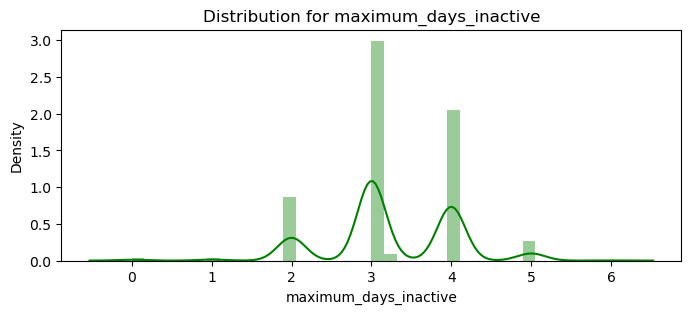

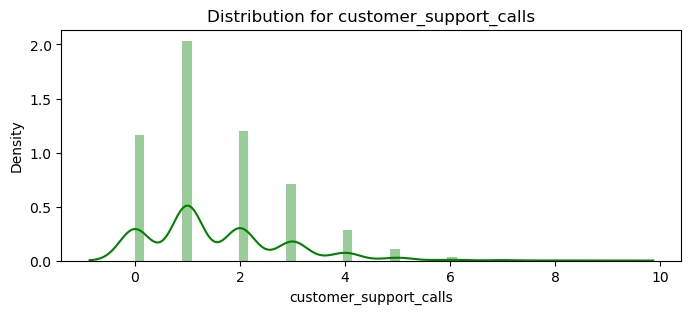

In [28]:
# creating distribution plot to understand distribution of all the matrix.
def distplot(feature, frame,color='g'):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature], color=color)
    
numeric_col = ['weekly_mins_watched','minimum_daily_mins','maximum_daily_mins','weekly_max_night_mins','videos_watched','maximum_days_inactive','customer_support_calls']
for feat in numeric_col: distplot(feat, df)


Since all the numerical columns are distributed across different ranges, I am using standard scaling to normalize them to the same range for consistency.

#### Standardizing numeric matrics 

* The code scales the numerical columns in a DataFrame using standard scaling and then visualizes their distributions with histograms. 
* This process helps in understanding how the features' values are distributed after scaling.

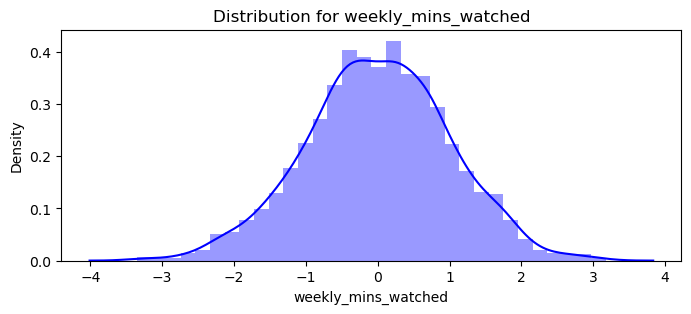

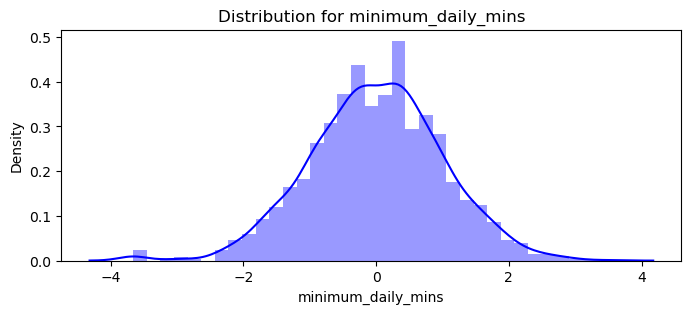

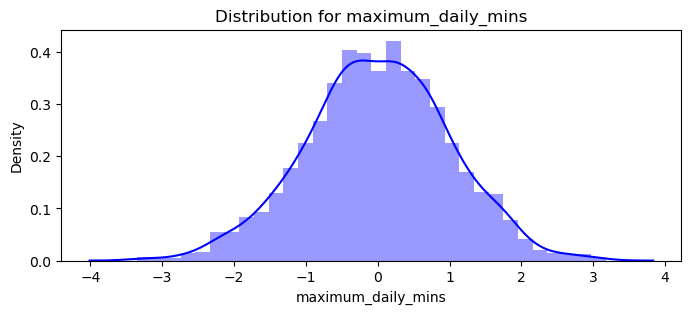

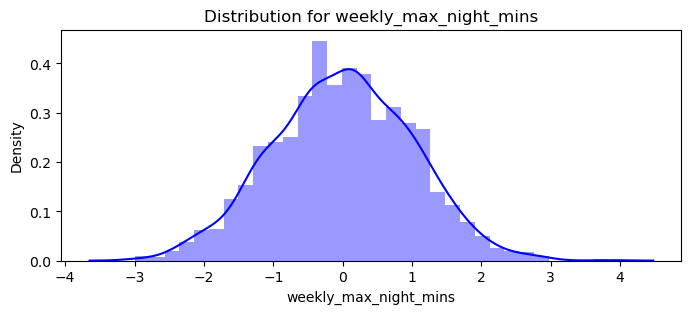

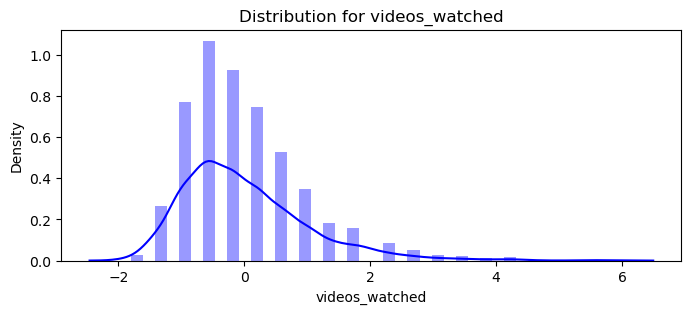

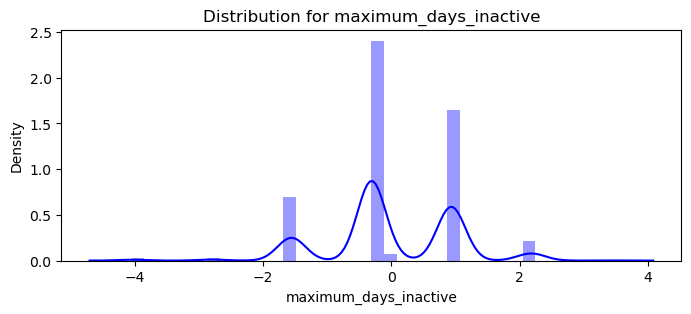

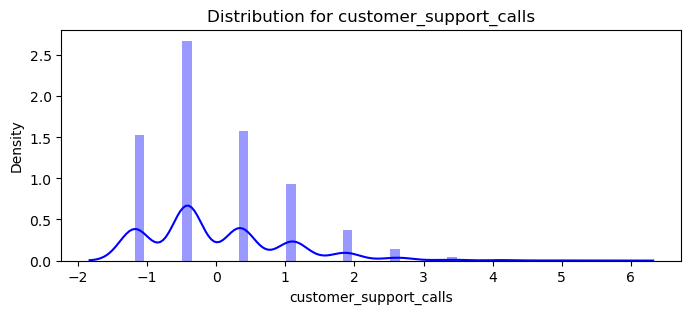

In [29]:
#standerdizing all matrix to distribute them properly.
df_std = pd.DataFrame(StandardScaler().fit_transform(df[numeric_col]),columns=numeric_col)
for feat in numeric_col: distplot(feat, df_std,color='b') 

In [30]:
#seprating categorical data for lable encoding,hot encoding.  
cat_hot_encode =['gender', 'multi_screen', 'mail_subscribed'] 
cat_cols_label = list(set(X_train.columns)- set(numeric_col) - set(cat_hot_encode)) 

#### Description 
* Dividing the columns allows us to apply label encoding for ordinal data.
* One-hot  encoding for nominal data, ensuring the model interprets the features correctly.

In [31]:
#rescaling metrix for train and test data.
scaler= StandardScaler()
X_train[numeric_col] = scaler.fit_transform(X_train[numeric_col])
X_test[numeric_col] = scaler.transform(X_test[numeric_col])

#### Why do we need to restandardized values:
As we’ve already standardized the data for visualization, we need to perform standardization again after splitting the data to ensure that:
* The training set is used to calculate scaling parameters.
* The test set is transformed using the same parameters from the training set to avoid data leakage and ensure reliable model evaluation.
* This ensures that the model trains on appropriately preprocessed data and is evaluated on unseen, correctly scaled test data.

### Model Selection,Training and Evaluation

### KNN 
The K-Nearest Neighbors (KNN) algorithm is a simple, non-parametric, and instance-based learning method used for both classification and regression tasks. It classifies a data point based on the majority class of its k closest neighbors in the feature space. In KNN:
* The distance between data points is typically measured using Euclidean distance.
* The algorithm doesn't explicitly learn a model; instead, it stores all the training data and makes predictions at runtime by finding the most common label among the k nearest neighbors of a test point.
* The value of k (number of neighbors) is crucial: a small k may lead to overfitting, while a large k could result in underfitting.

In [32]:
#creating model.
knn_model = KNeighborsClassifier(n_neighbors = 15) 
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn = knn_model.score(X_test,y_test)
print("accuracy:",accuracy_knn)

accuracy: 0.8683333333333333


In [33]:
#checking model's performance.
knn_dict=classification_report(y_test,predicted_y,output_dict=True)
knn_df=pd.DataFrame(knn_dict).transpose()
knn_df

precision    recall  f1-score     support
0              0.868333  1.000000  0.929527  521.000000
1              0.000000  0.000000  0.000000   79.000000
accuracy       0.868333  0.868333  0.868333    0.868333
macro avg      0.434167  0.500000  0.464764  600.000000
weighted avg   0.754003  0.868333  0.807139  600.000000

After making predictions, we evaluate the model's performance using metrics like precision, recall, f1-score, and support to understand how well the model performed beyond just accuracy:
1. Precision: Measures the accuracy of positive predictions. It shows the proportion of true positive predictions among all positive predictions (TP / (TP + FP)). Higher precision means fewer false positives.
2. Recall: Measures the ability to find all positive instances. It shows the proportion of actual positives that were correctly identified (TP / (TP + FN)). Higher recall means fewer false negatives.
3. F1-Score: The harmonic mean of precision and recall. It provides a balanced measure when precision and recall are important, especially when the data is imbalanced.
4. Support: Indicates the number of actual occurrences of each class in the dataset, providing context for the metrics.

These metrics help evaluate the quality of a model's predictions, especially in imbalanced datasets where accuracy alone may be misleading.

### Random Forest-
Random Forest is a machine learning algorithm used for both classification and regression tasks. It works by creating a collection of decision trees during training and combining their results.
* It builds many decision trees from different subsets of the data.
* Each tree makes its own prediction, and the random forest takes the majority vote (for classification) or the average (for regression) of all the trees to make the final prediction.
* Reduces overfitting: By averaging the predictions of multiple trees, random forests are less likely to overfit than individual decision trees.
* Handles missing data: It can manage datasets with missing values.
* Works well with large datasets: It's great for handling large datasets with many features.
In short, Random Forest is like making multiple "voting" decisions by different trees, and the final decision is the combination of all their votes.

In [34]:
#random forest model.
rf_model = RandomForestClassifier(n_estimators=185 , oob_score = True, n_jobs = -1,random_state =50, max_features = "auto",
                                  max_leaf_nodes = 55)
rf_model.fit(X_train, y_train)

predicted_y_rf = rf_model.predict(X_test)
print (metrics.accuracy_score(y_test, predicted_y_rf)) 


0.9266666666666666


In [35]:
#checking accuracy.
rf_dict=classification_report(y_test,predicted_y_rf,output_dict=True)
rf_df=pd.DataFrame(rf_dict).transpose()
rf_df

precision    recall  f1-score     support
0              0.936015  0.982726  0.958801  521.000000
1              0.830189  0.556962  0.666667   79.000000
accuracy       0.926667  0.926667  0.926667    0.926667
macro avg      0.883102  0.769844  0.812734  600.000000
weighted avg   0.922081  0.926667  0.920337  600.000000

### Confusion Matrix 
A confusion matrix is a simple table that shows how well a classification model's predictions match the actual results. It tells you how many times the model was right or wrong by comparing the predicted classes with the true classes.
Structure of a Confusion Matrix:
#### The matrix typically has four components:
* True Positive (TP): Correctly predicted positive cases.
* True Negative (TN): Correctly predicted negative cases.
* False Positive (FP): Incorrectly predicted positive cases (Type I error).
* False Negative (FN): Incorrectly predicted negative cases (Type II error).

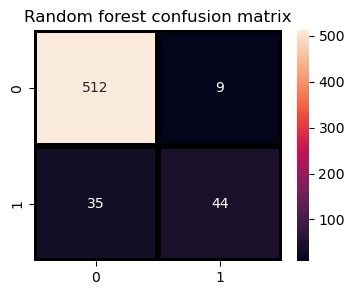

In [36]:
#creating heatmap for Random forest model.
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predicted_y_rf),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Random forest confusion matrix",fontsize=12)
plt.show()

### Insights
In this case, with 0 representing "not churn" and 1 representing "churn," here’s a summary:
#### Not Churn (0):
The model predicts "not churn" very accurately, with 98.3% precision and recall. Out of 521 actual "not churn" instances, 512 were correctly classified.
#### Churn (1):
The model struggles more with predicting churn. While precision is 83% (meaning when it predicts churn, it's correct 83% of the time), recall is only 55.7%, indicating it misses many actual churn instances (35 out of 79 were misclassified as "not churn").
This indicates that while the model is good at identifying customers who are not likely to churn, it may need improvement in detecting those who are at risk of churning.


### ROC Curve
An ROC curve (Receiver Operating Characteristic curve) is a graph that shows how well a classification model distinguishes between two classes. It plots the True Positive Rate (TPR) (also called recall) against the False Positive Rate (FPR) at different thresholds.
* True Positive Rate (TPR): The proportion of actual positives correctly identified (recall).
* False Positive Rate (FPR): The proportion of actual negatives incorrectly identified as positives.


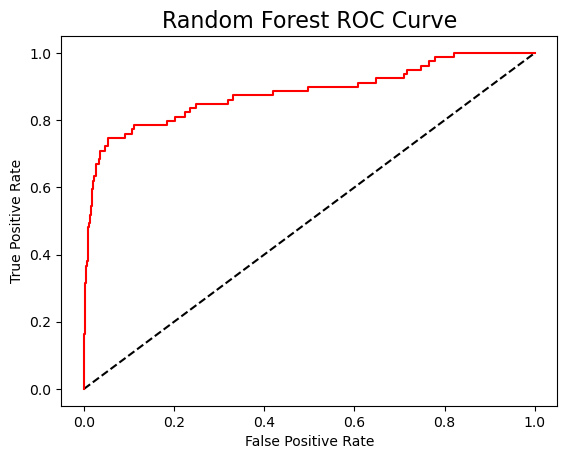

In [37]:
#creating roc curve for random forest.
y_rfpred_prob = rf_model.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_rfpred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr_rf, tpr_rf, label='Random Forest',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve',fontsize=16)
plt.show();

### Observations:
* AUC: The area under the curve (AUC) appears to be close to 1, which is excellent. This indicates that the Random Forest model is performing very well in distinguishing between positive and negative classes.
* Curve Shape: The curve is shifted towards the top-left corner, indicating a high True Positive Rate (TPR) and a low False Positive Rate (FPR) across various classification thresholds. This is a desirable characteristic for a good classification model.
* Diagonal Line: The diagonal line represents a random classifier. The fact that the ROC curve is significantly above this line confirms that the model is performing better than random guessing.

### SVC
SVC (Support Vector Classifier) is a machine learning algorithm used to classify data. It works by finding the best line (or hyperplane) that separates different classes of data points. The goal is to place the line in such a way that the gap (or margin) between the two classes is as wide as possible.
If the data isn't easily separable, SVC can use something called a kernel to transform the data and make it easier to classify. It's effective for both simple and complex classification tasks.

In [38]:
#suppert vector classification.
svc_model=SVC(random_state=99)
svc_model.fit(X_train,y_train)
predict_y=svc_model.predict(X_test)
svc=svc_model.score(X_test,y_test)
print('accurancy is :',svc)

accurancy is : 0.8683333333333333


In [39]:
#checking performance.
svc_dict=classification_report(y_test,predicted_y,output_dict=True)
svc_df=pd.DataFrame(svc_dict).transpose()
svc_df

precision    recall  f1-score     support
0              0.868333  1.000000  0.929527  521.000000
1              0.000000  0.000000  0.000000   79.000000
accuracy       0.868333  0.868333  0.868333    0.868333
macro avg      0.434167  0.500000  0.464764  600.000000
weighted avg   0.754003  0.868333  0.807139  600.000000

### Logistic Regression
Logistic regression is a machine learning algorithm used for binary classification tasks (e.g., yes/no, true/false). Instead of predicting exact values, it predicts the probability that a given input belongs to a certain class.
* It uses the logistic function (sigmoid) to map predicted values between 0 and 1.
* If the probability is above a certain threshold (usually 0.5), the model classifies it as one class (e.g., positive); otherwise, it classifies it as the other class (e.g., negative).
* It's simple and interpretable, often used for problems like spam detection or medical diagnosis.
In short, logistic regression is a method to classify data into two categories by estimating probabilities.

In [40]:
#logistic regression model.
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
accuracy_lr = lr_model.score(X_test,y_test)
print("accuracy is :",accuracy_lr)

accuracy is : 0.8733333333333333


In [41]:
#evaluating performance.
lr_pred=lr_model.predict(X_test)
lr_dict=classification_report(y_test,predicted_y,output_dict=True)
lr_df=pd.DataFrame(lr_dict).transpose()
lr_df

precision    recall  f1-score     support
0              0.868333  1.000000  0.929527  521.000000
1              0.000000  0.000000  0.000000   79.000000
accuracy       0.868333  0.868333  0.868333    0.868333
macro avg      0.434167  0.500000  0.464764  600.000000
weighted avg   0.754003  0.868333  0.807139  600.000000

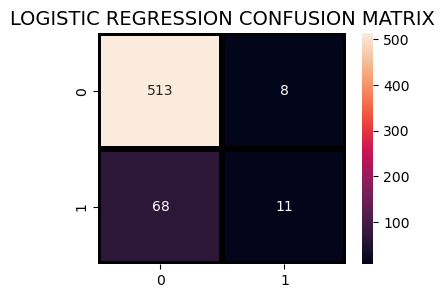

In [42]:
#creating confusion matrix visulaizationin heatmap.
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, lr_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("LOGISTIC REGRESSION CONFUSION MATRIX",fontsize=14)
plt.show()

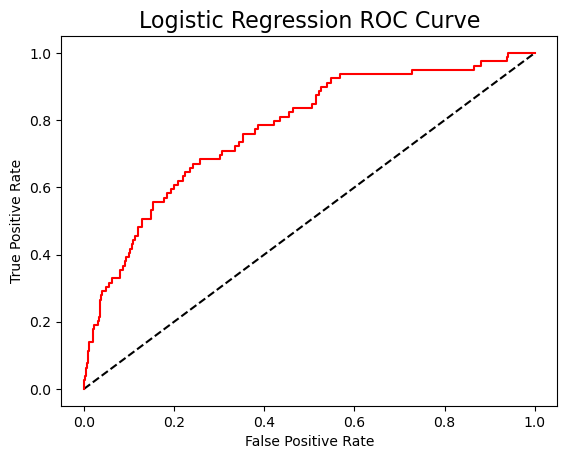

In [43]:
#roc curve for logistic regression.
y_pred_prob = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--' )
plt.plot(fpr, tpr, label='Logistic Regression',color = "r")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve',fontsize=16)
plt.show();

### Decision Tree
A decision tree is a type of model used in machine learning for making predictions. It looks like a tree and helps decide based on answers to questions.
* Structure: It has branches (like a tree) where each branch represents a question about the data.
* How it works: You start at the top and answer questions. Depending on your answers, you move down the branches until you reach a final decision at the bottom.
* Easy to understand: Decision trees are simple and clear, making it easy to see how a decision was made.
In short, a decision tree helps you make predictions by asking a series of questions in a simple, visual way.

In [44]:
#decision tree.
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("accuracy is :",accuracy_dt) 

accuracy is : 0.875


In [45]:
#model performance.
dt_dict=classification_report(y_test,predicted_y,output_dict=True)
dt_df=pd.DataFrame(dt_dict).transpose()
dt_df

precision    recall  f1-score     support
0              0.868333  1.000000  0.929527  521.000000
1              0.000000  0.000000  0.000000   79.000000
accuracy       0.868333  0.868333  0.868333    0.868333
macro avg      0.434167  0.500000  0.464764  600.000000
weighted avg   0.754003  0.868333  0.807139  600.000000

#### Random Classifier

In [46]:
#random forest classifier.
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
predictdt_y = dt_model.predict(X_test)
accuracy_dt = dt_model.score(X_test,y_test)
print("Random Forest accuracy is :",accuracy_dt)

Random Forest accuracy is : 0.875


#### Voting classifier

In [47]:
#final accurancy with voting classifier.
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier()
clf2 = LogisticRegression()
eclf1 = VotingClassifier(estimators=[('gbc', clf1), ('lr', clf2)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print("Final Accuracy Score",accuracy_score(y_test, predictions))

Final Accuracy Score 0.905


In [48]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       521
           1       0.89      0.32      0.47        79

    accuracy                           0.91       600
   macro avg       0.90      0.66      0.71       600
weighted avg       0.90      0.91      0.88       600



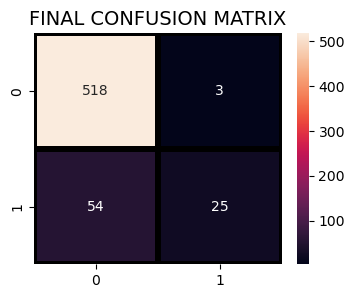

In [49]:
#creating heatmap
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, predictions),
                annot=True,fmt = "d",linecolor="k",linewidths=3)    
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

The Voting Classifier combines a Random Forest and Logistic Regression model using soft voting, achieving an overall accuracy of 91%. While the model performs well for the majority class (not churn, class 0) with high precision (0.91) and recall (1.00), it struggles with the minority class (churn, class 1), showing low recall (0.32) and a higher number of false negatives (52). The confusion matrix reflects these issues, suggesting the need for addressing class imbalance to improve churn detection.